# CNN (Convolutional Neural Network)

* Feature Extraction: Convolution + ReLU --> Pooling layer --> Flatten to 1D Array
* CNN Process: Feature extraction --> Classification(ANN)
* Convolution is multiplication of dataset matrix and filter matrix
* relu helps make the model non-linear
* Pooling layer is used to reduce size of matrix 
    * 2X2 filter finds maximum out of the 4 elements with stride = 1 
* Used mainly for image classification 
* CNN doesn't take care of rotation and scale hence data augmentation is used


In [52]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

'frog'

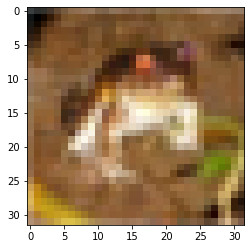

In [54]:
# import data
(x_train, y_train) , (x_test, y_test) = keras.datasets.cifar10.load_data()

# normalize data for better accuracy of neural network
x_train = x_train / 255
x_test = x_test / 255

# flatten y_train and y_test 
y_train = y_train.flatten()
y_test = y_test.flatten()

# visualize data
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow(x_train[0])
classes[y_train[0]]

In [64]:
# Data Augmentation: Helps alter image dataset by flip, rotation, zoom to improve model accuracy

img_height = 32
img_width = 32

data_augmentation = keras.Sequential([
    keras.layers.Input(shape=(img_height, img_width, 3)),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [57]:
# Convolution+relu --> MaxPooling --> Convolution+relu --> MaxPooling --> Flatten to 1D array --> Classification
# Convolution+relu: 
    # 32 filters of size 3X3 matrix convolute with input matrix of size 32 X 32 X 3 (3 is for BGR Channel)
    # Give inside Conv2D:
    # padding = 'same'
        # creates a boundary of 1 extra row and 1 extra column around the image (optional)
    # strides = (1,1)
        # It is how many cells does the filter move while convoluting around the input matrix (optional)
# Batch normalization: Automatically standardizes the inputs,  accelerates the training process
# MaxPooling: 2X2 matrix with stride = 1 finds max out of 4 elements and reduces matrix size 
# Dropout regularization helps stop overfitting of model by dropping neurons randomly 
# softmax activation function is popular in CNN for giving a probabilistic array output

# compile, fit, evaluate

cnn = keras.Sequential([
    
    data_augmentation,
    keras.layers.Input(shape= (32,32,3)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=1)

cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 10ms/step - loss: 1.3557 - accuracy: 0.5290


[1.3557493686676025, 0.5289999842643738]

'cat'

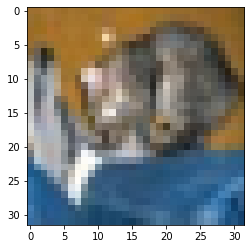

In [58]:
# store predictions
# image classes are stored as probabilities, argmax is used to give index of max probability of an array
y_predict = cnn.predict(x_test)

y_predict_labels = [np.argmax(i) for i in y_predict]

plt.imshow(x_test[0])
classes[y_predict_labels[0]]

# Save, Load or Delete Deep Learning Model

In [35]:
# model.save('tfmodel')
# model = load_model('tfmodel')
# del model